First Practical Project - MINDD
-----
-----

Authors:
--------
Ana Rita Silva - 1211152

Jorge Cruz - 1221715


-----

This project aims to develop predictive models to estimate the success of bank's telemarketing campaigns using data mining techniques. Based on a dataset collected by retail bank between 2008-2013, the CRISP-DM methodology was applied to understand, prepare, model and evaluate the data, identifying factors that influence customer subscription and supporting strategic decisions in the future campaigns

# 1. Data Presentation and Exploratory Analysis

In this first chapter, the dataser used in this project is presented, followed by a detailed exploratoru analysis aimed at understanding the structure, characteristics and potential patterns relevant to the modeling phase.

#### Imports of the libraries

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.naive_bayes import GaussianNB

 ##### Loading the dataset

In [38]:
df = pd.read_csv('bank.csv', delimiter=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


##### First 5 rows of the dataset

In [39]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


##### Last 5 rows of the dataset

In [40]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


##### Shape and size of the dataset

In [41]:
shape = df.shape
size = df.size
print('Number of rows: ', shape[0])
print('Number of columns: ', shape[1])
print('Size of the dataset: ', size)

Number of rows:  41188
Number of columns:  21
Size of the dataset:  864948


##### Number of columns

In [42]:
len(df.columns)

21

##### Separation of the features into two lists (categorical and numerical)

In [43]:
all_columns = df.columns
goal_attribute = 'y'
predictors = all_columns.drop(goal_attribute)

categorical_predictors = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numeric_predictors = predictors.drop(categorical_predictors)

print('Predictors:', list(predictors))
print()
print('Categorical Predictors:', list(categorical_predictors))
print()
print('Numeric Predictors:', list(numeric_predictors))

Predictors: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

Categorical Predictors: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

Numeric Predictors: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


##### Checking de types of the columns

In [44]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

The dataset contains a variety of variable types. There are categorical variables ('job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y') describing costumer and contact characteristics. Integer variables ('age', 'duration', 'campaign', 'pdays', 'previous') representing counts and measurements. There are also continous variables ('emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'), associated to econimic indicators.   

##### Dropping duplicated rows

In [45]:
df.drop_duplicates()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


12 rows were removed from de Dataset.

##### Target Variable

In [46]:
y_counts = df['y'].value_counts()
y_percentage = df['y'].value_counts(normalize=True)*100

y_var_dataframe = pd.DataFrame({
    "Count": y_counts,
    "Percentage": y_percentage
})

y_var_dataframe

,Count,Percentage
y,,
no,36548,88.734583
yes,4640,11.265417


The target variable 'y' is highly imbalanced, with 88.7% of instances labeled 'no' and 11.3% labeled 'yes'. This significant class imbalanced may reduce the performance of the model.

##### Visualization of the data

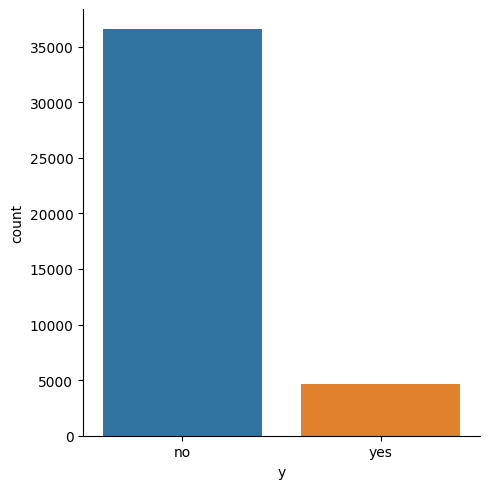

In [47]:
sns.catplot(x="y", hue="y", kind="count", data=df, legend=False)
plt.show()

-----
#### Descriptive statistics
-----


##### For numeric predictors

In [48]:
df.describe(include=['float64', 'int64'])

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


The descriptive ananlysis of the numerical variables provided key insights into the data distribution and characteristics:

- *Count:* All numeric variables have 41188 observations.

- *Mean:* The average age is around 40 years and the mean contact duration is 258 seconds. On average, each client was contacted 3 times.

- *Standard deviation:* Variables such as 'duration' (std = 259.27) and 'pdays' (std = 186.91), show highly variability, suggesting significant dispersion in the values.

- *Min and Max:* Wide ranges are observed in age (min = 17, max = 98) and duration (min = 0, max = 4918), indicating potential outliers.

- *Quartiles (25%, 50%, 75%):* The median duration is 180 seconds, and 75% of the clients are 47 years old, showing a concentration of adults.


##### For categoric predictors

In [49]:
df.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


The descriptive analysis of the categorical variables shows the diversity and frequency of categories in the dataset:

- *Count:* All categoric varibales contain 41188 observations.

- *Unique:* The number of unique categories varies, with 'job' having 12 categories and 'y' 2 categories ('yes' and 'no').

- *Most frequent values:* The most common categories are 'admin' for 'job' (10422 records), 'married' for 'marital' (24928 records), 'university.degree' for education (12168 records), 'cellular' for 'contact' (26144 records), 'may' for 'month' (13769 records) and 'thursday' for 'day_of_week' (8623 records). Most of the clients have 'no' 'default', 'housing' = 'yes' and 'loan' = 'no'.

With this values it is possible to conclude that the majority of the contacts were made by 'cellular', mainly in 'may' and on 'thursdays', while most previous campaigns had 'nonexistent' outcome. The target 'y' is dominated by 'no' responses, meaning that most of the clients did not subscribed for a term deposit.


-----
#### Univariate Variables
-----

##### For numeric predictors

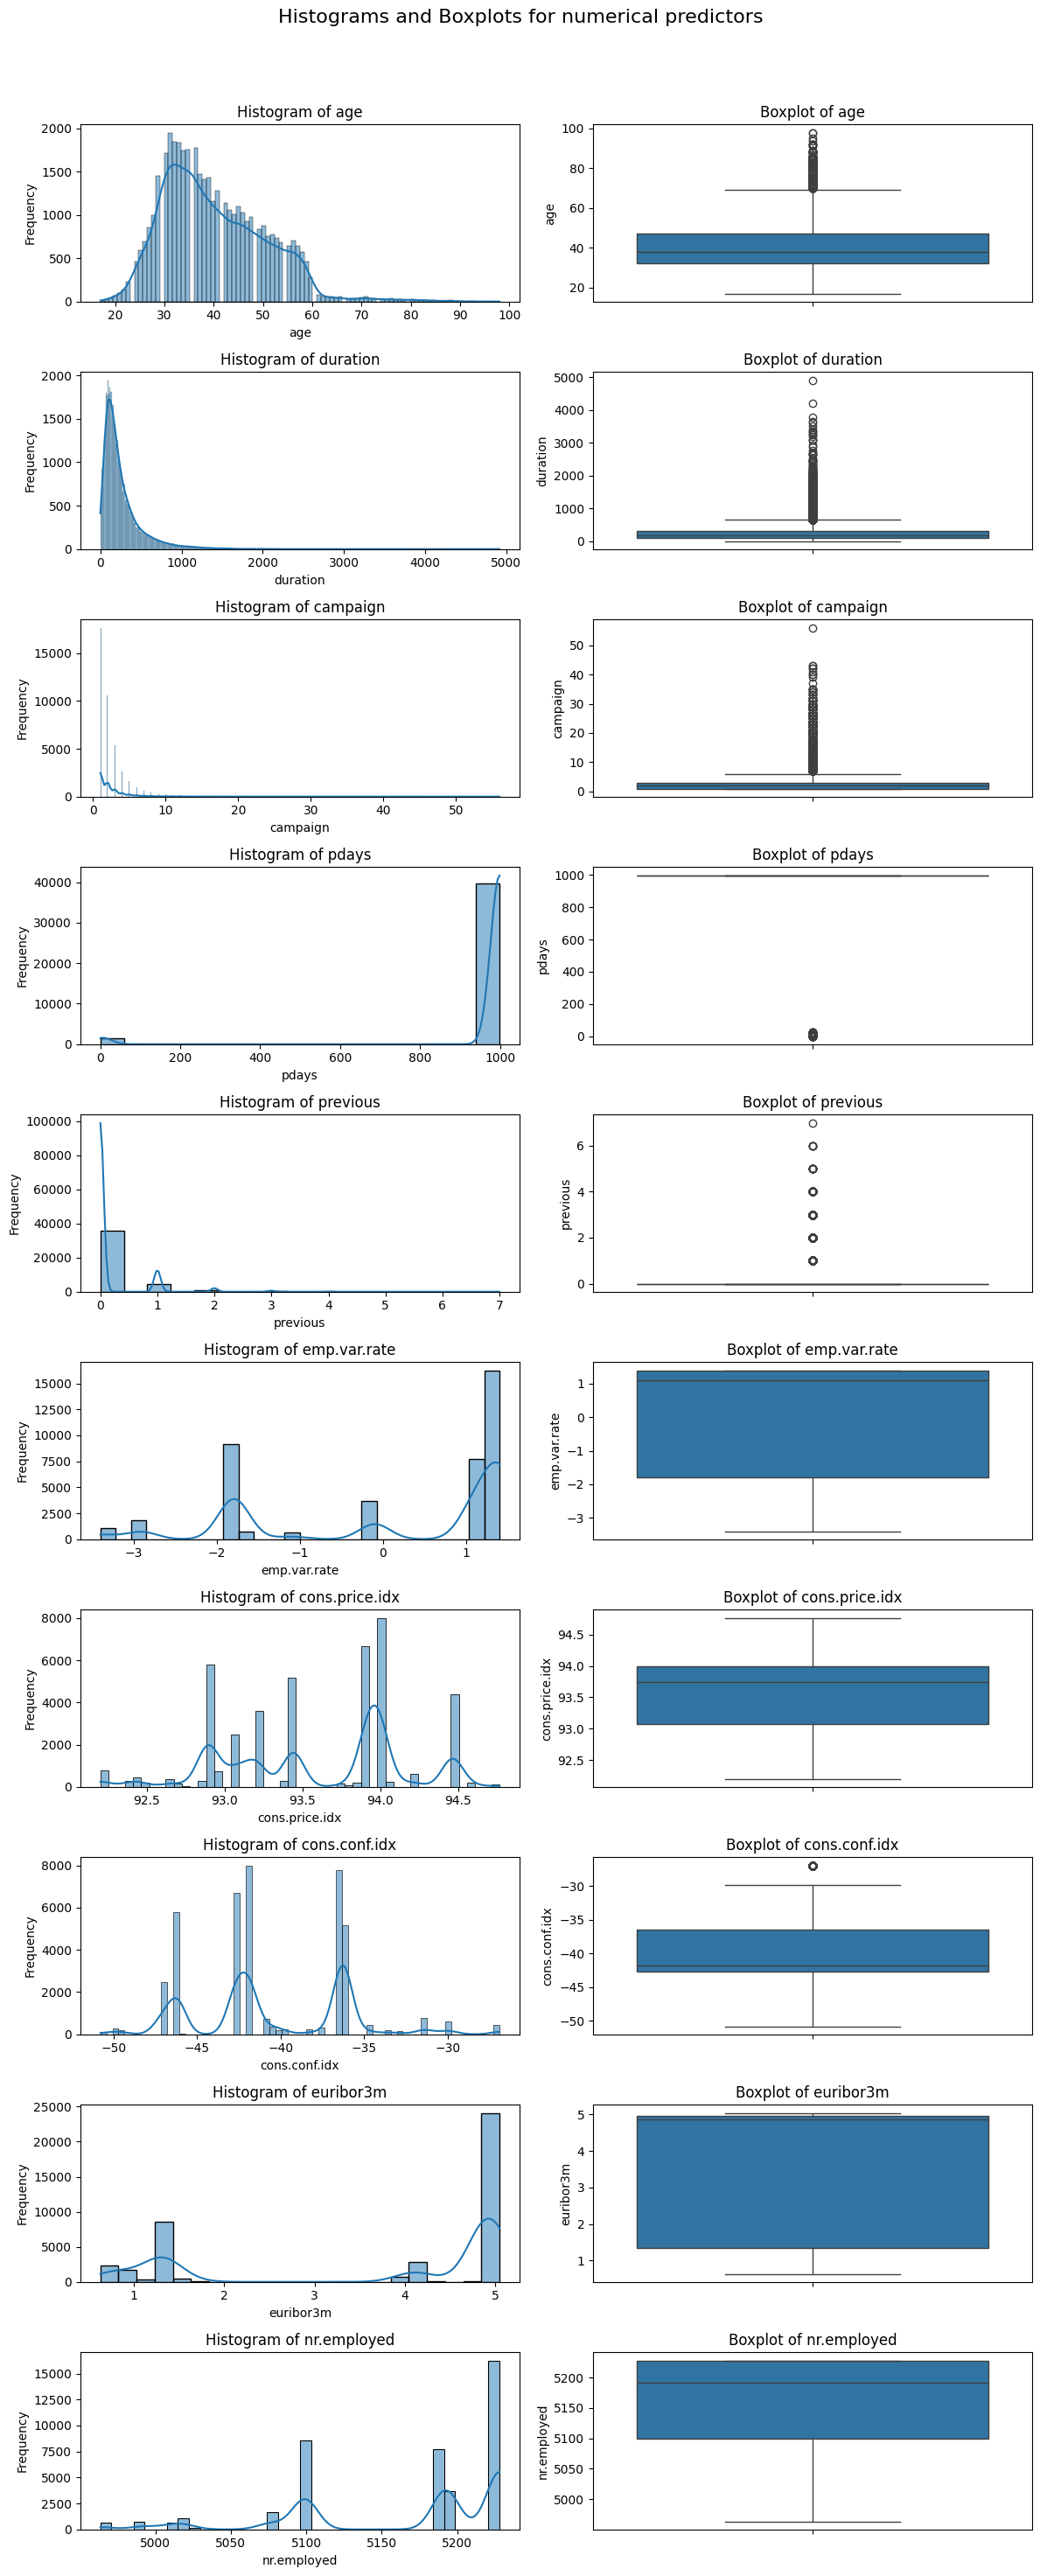

In [50]:
fig, axe = plt.subplots(nrows = len(numeric_predictors), ncols = 2, figsize = (12, 3*len(numeric_predictors)))
fig.suptitle('Histograms and Boxplots for numerical predictors', fontsize=16)

for i, column in enumerate(numeric_predictors):
    sns.histplot(df[column], ax=axe[i, 0], kde=True)
    axe[i, 0].set_title(f"Histogram of {column}")
    axe[i, 0].set_xlabel(column)
    axe[i, 0].set_ylabel("Frequency")

    sns.boxplot(y=df[column], ax=axe[i, 1])
    axe[i, 1].set_title(f"Boxplot of {column}")
    axe[i, 1].set_ylabel(column)


plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

The graphs ilustrate the distribution of the numerical predictors:

1. *Age:* The histogram shows that most of the clients have ages between 30 and 40 years old. The boxplot confirms the pattern, displaying a median age around 36-38 years and several outliers above 60, representing older clients.
2. *Duration:* The histogram shows a right-skewed distribution, where most of the last calls have a small *duration*. Tha boxplot confirms this pattern, with a low median and numerous outliers representing long calls. While most of the calls are brief, there are a small number of calls that extend in duration.
3. *Campaing:* The histogram indicates that most of the clients were contacted only once or twice during a campaign, while a very small number experienced many contact attempets. The boxplot represents a low median and the presence of numerous outliers, representing clients who were contacted an unusually number of times.
4. *Pdays:* The histogram shows an extreme peak of 999, confirming that most clients had not been previosly contacted (0 days after the client was last contacted because he was never contacted previously). Very few observations fall bellow this value, representing clients who were reached out in earlier campaigns. The boxplot represents that, with nearly all data concentrated at the upper limit (999) and a few low outliers for clients previously contacted, indicating prior contacts are rare.
5. *Previous:* The histogram indicates thar most clients had no prior contact (value = 0), while a smaller group had been contacted once or twice. Also, the boxplot can prove that, once the median is very low and the outliers are present, corresponding to clients who had multiple past contacts. Overall this suggests that the majority of the clients were approached for the first time in the current campaign.
6. *emp.var.rate:* The graphs represent the distribution of the variabel 'emp.var.rate', which reflects quarterly changes in employment. The histogram reveals clear peaks around -2 and 1, inicating that the data cover periods of negative employment variation and positive variation.  (?????)
7. *cons.price.idx:* The graphs represent the distribution of the variable 'cons.price.idx', which represents the montlhy consumer price index. The histogram reveals several peaks between 92.5 and 94.5, (?????)
8. *cons.conf.idx:*
9. *euribor3m:* The graphs represent the variable 'euribor3m', which represents the three-month euribor rate, an economic indicator. The histogram, wiht major peaks around 1.3 and 5.0 (??????)
10. *nr.employed:* The histogram indicates several different peaks between 5000 ane 5220, indicating that the data cover different time periods with a variety of employment levels. Most observations are near 5200, suggesting that the majority of records correspond to quarters with higher employment rates. The boxplot shows a limited variability and no significant outliers.

##### For categorical predictors

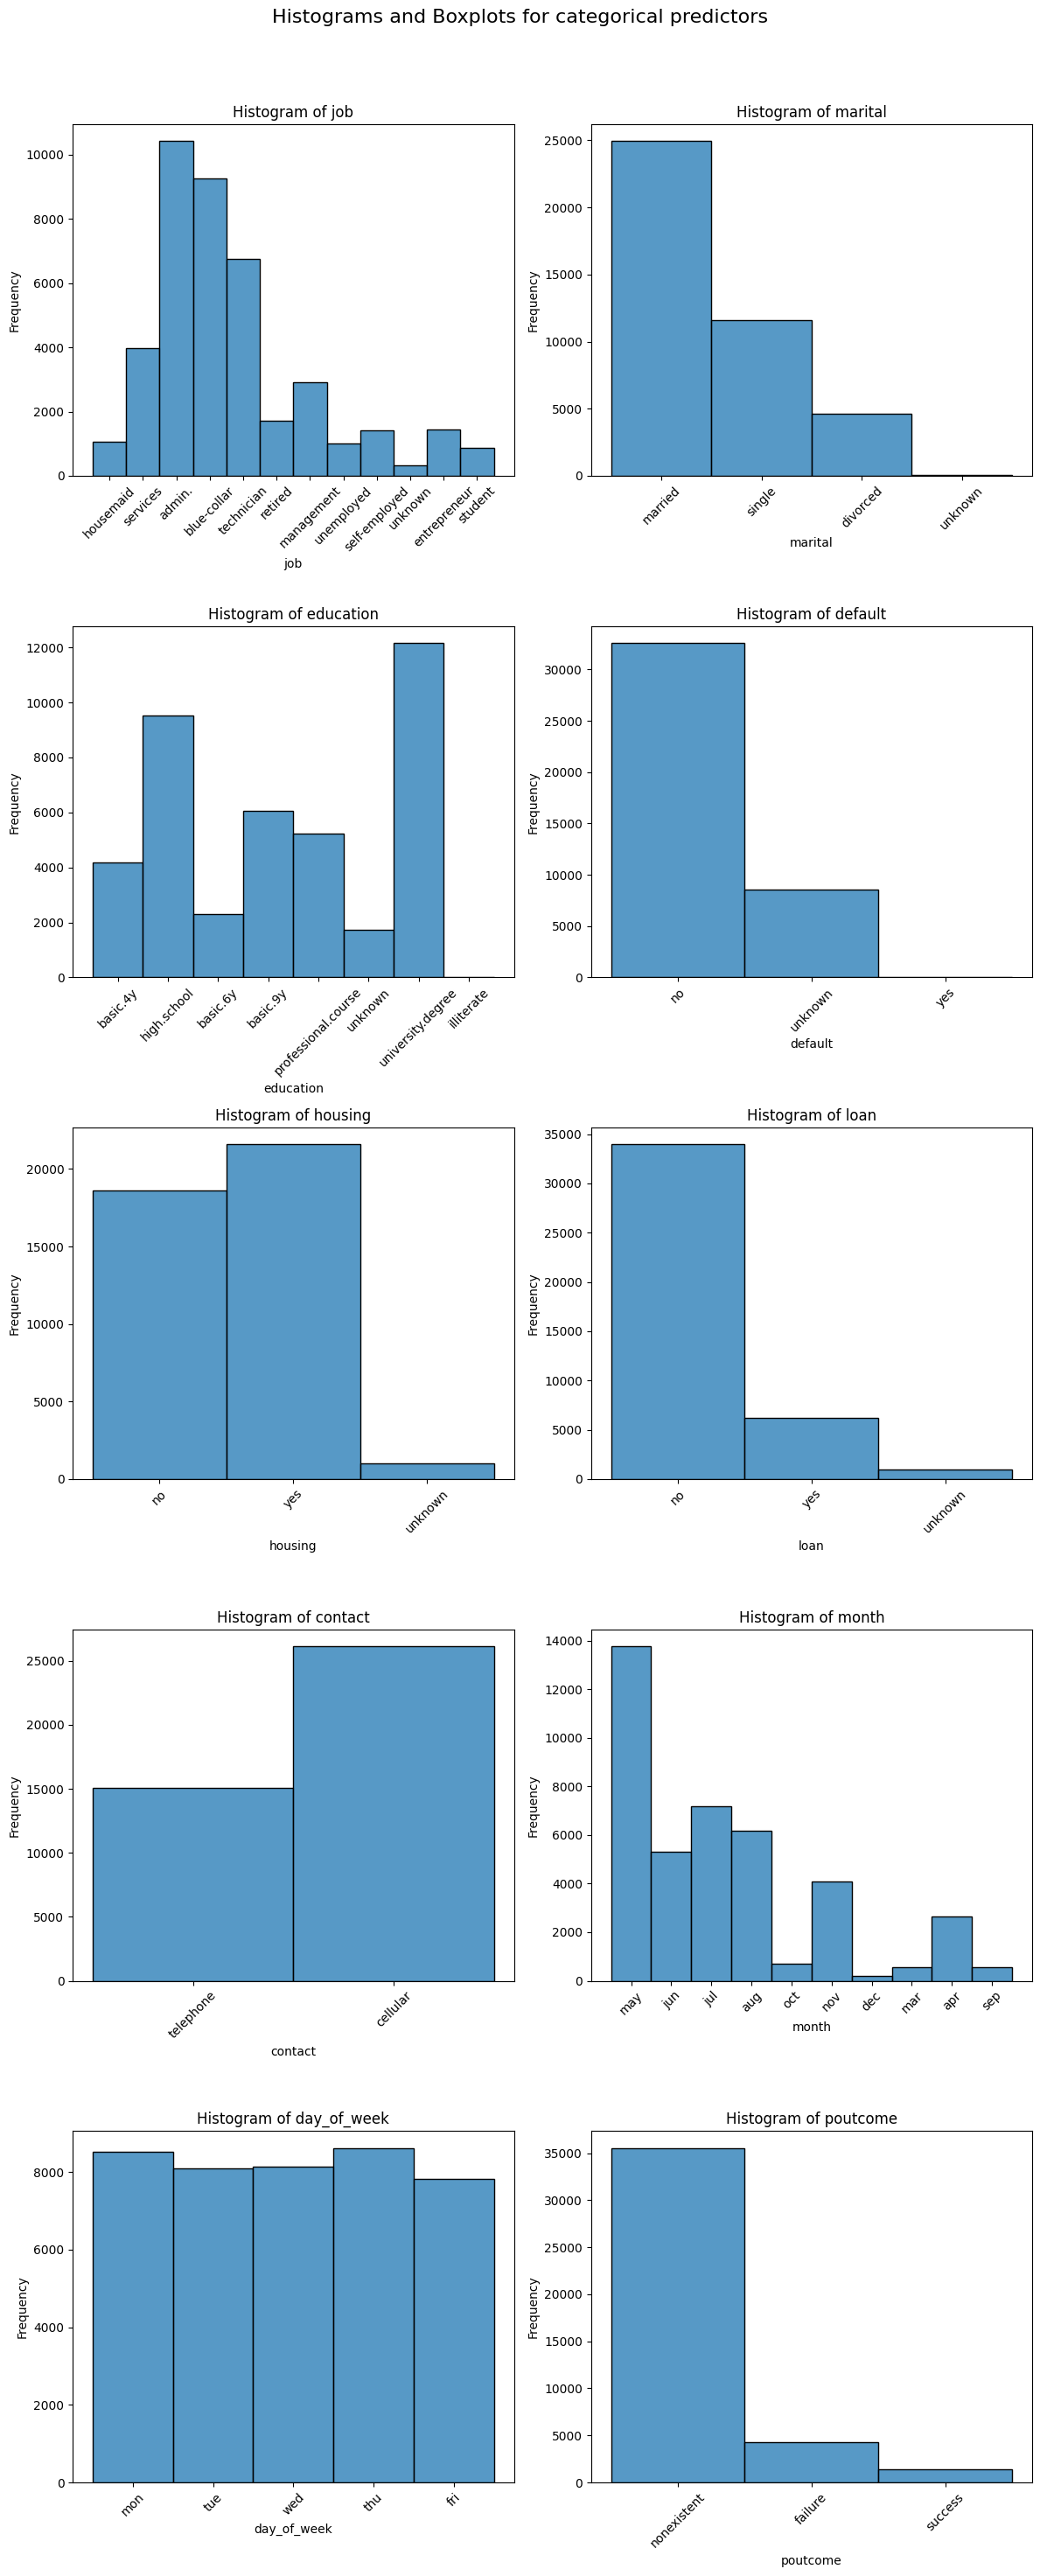

In [36]:
fig, axes = plt.subplots(nrows = int(len(categorical_predictors)/2), ncols = 2, figsize = (12, 3*len(categorical_predictors)))
fig.suptitle('Histograms and Boxplots for categorical predictors', fontsize=16)

lin = 0
for i, column in enumerate(categorical_predictors):
    col = i % 2 
    sns.histplot(df[column], ax=axes[lin, col])
    axes[lin, col].set_title(f"Histogram of {column}")
    axes[lin, col].set_xlabel(column)
    axes[lin, col].set_ylabel("Frequency")
    axes[lin, col].tick_params(axis='x', rotation=45)

    if i%2 == 1:
        lin = lin + 1


plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

The graphs ilustrate the distribution of the categorical predictors:

1. *Job:* The most frequent categories are 'admin', 'blue-collar' and 'techician', which represent the job of the majority clients of the dataset.
2. *Marital:* Almost 25000 clients are 'married', followed by 'single' and 'divorced'. The 'unknown' category is nearly absent, indicating that marital status information is well recorded.
3. *Education:* For 'education', the most common level is 'university.degree', followed by 'high.school'. A smaller number of clients have 'unknwon' education information.
4. *Default:* Regarding 'default', mos clients have 'no' credit in default, while a smaller group is labeled as 'unknown'. This suggests that defaulting on credit is rare among the clients in the dataset.
5. *Housing:* Most of the clients have 'housing' loan, followed closely by those without one and a small portion of records are marked as 'unknown'. This indicates that 'housing' loans are relatively common amog clients.
6. *Loan:* The majority of clients do not have a personal 'loan', while a smaller group does and a few entries are 'unknown'. Overall, these distributions show that 'housing' loans are more frequent than personal 'loans' among the clients in the dataset.
7. *Contact:* For 'contact', most of the clients were reached via 'cellular', while a smaller portion were contacted by 'telephones'. This indicates a shift toward modern communication channels in marketing campaigns.
8. *Month:* The highest number of contacts occurred in 'may', follwed by 'july', 'august' and 'june', showing that most compaigns were concentraded in the middle of the year. Fewer contacts were made during the winter months, such as 'december', suggesting a strong seasonal pattern in campaign activity
9. *day_of_week:* The number of client contacts is distributed from 'monday' to 'friday', with only minor differences, which indicates that marketing calls were made consistently throughout the workweek, without a strong preference for any specific day.
10. *poutcome:* The 'poutcome' represents th outcome of the previous marketing campaign, knowing the values of this variable, it can be affirmed that the majority of the clients have 'nonexistent' value, meaning they were not previously contacted. Among those who were, most experienced 'failure', while a small fraction were succeed. This outcome indicates that prior campaign success rates were low. 

-----
#### Bivariate Variables
-----

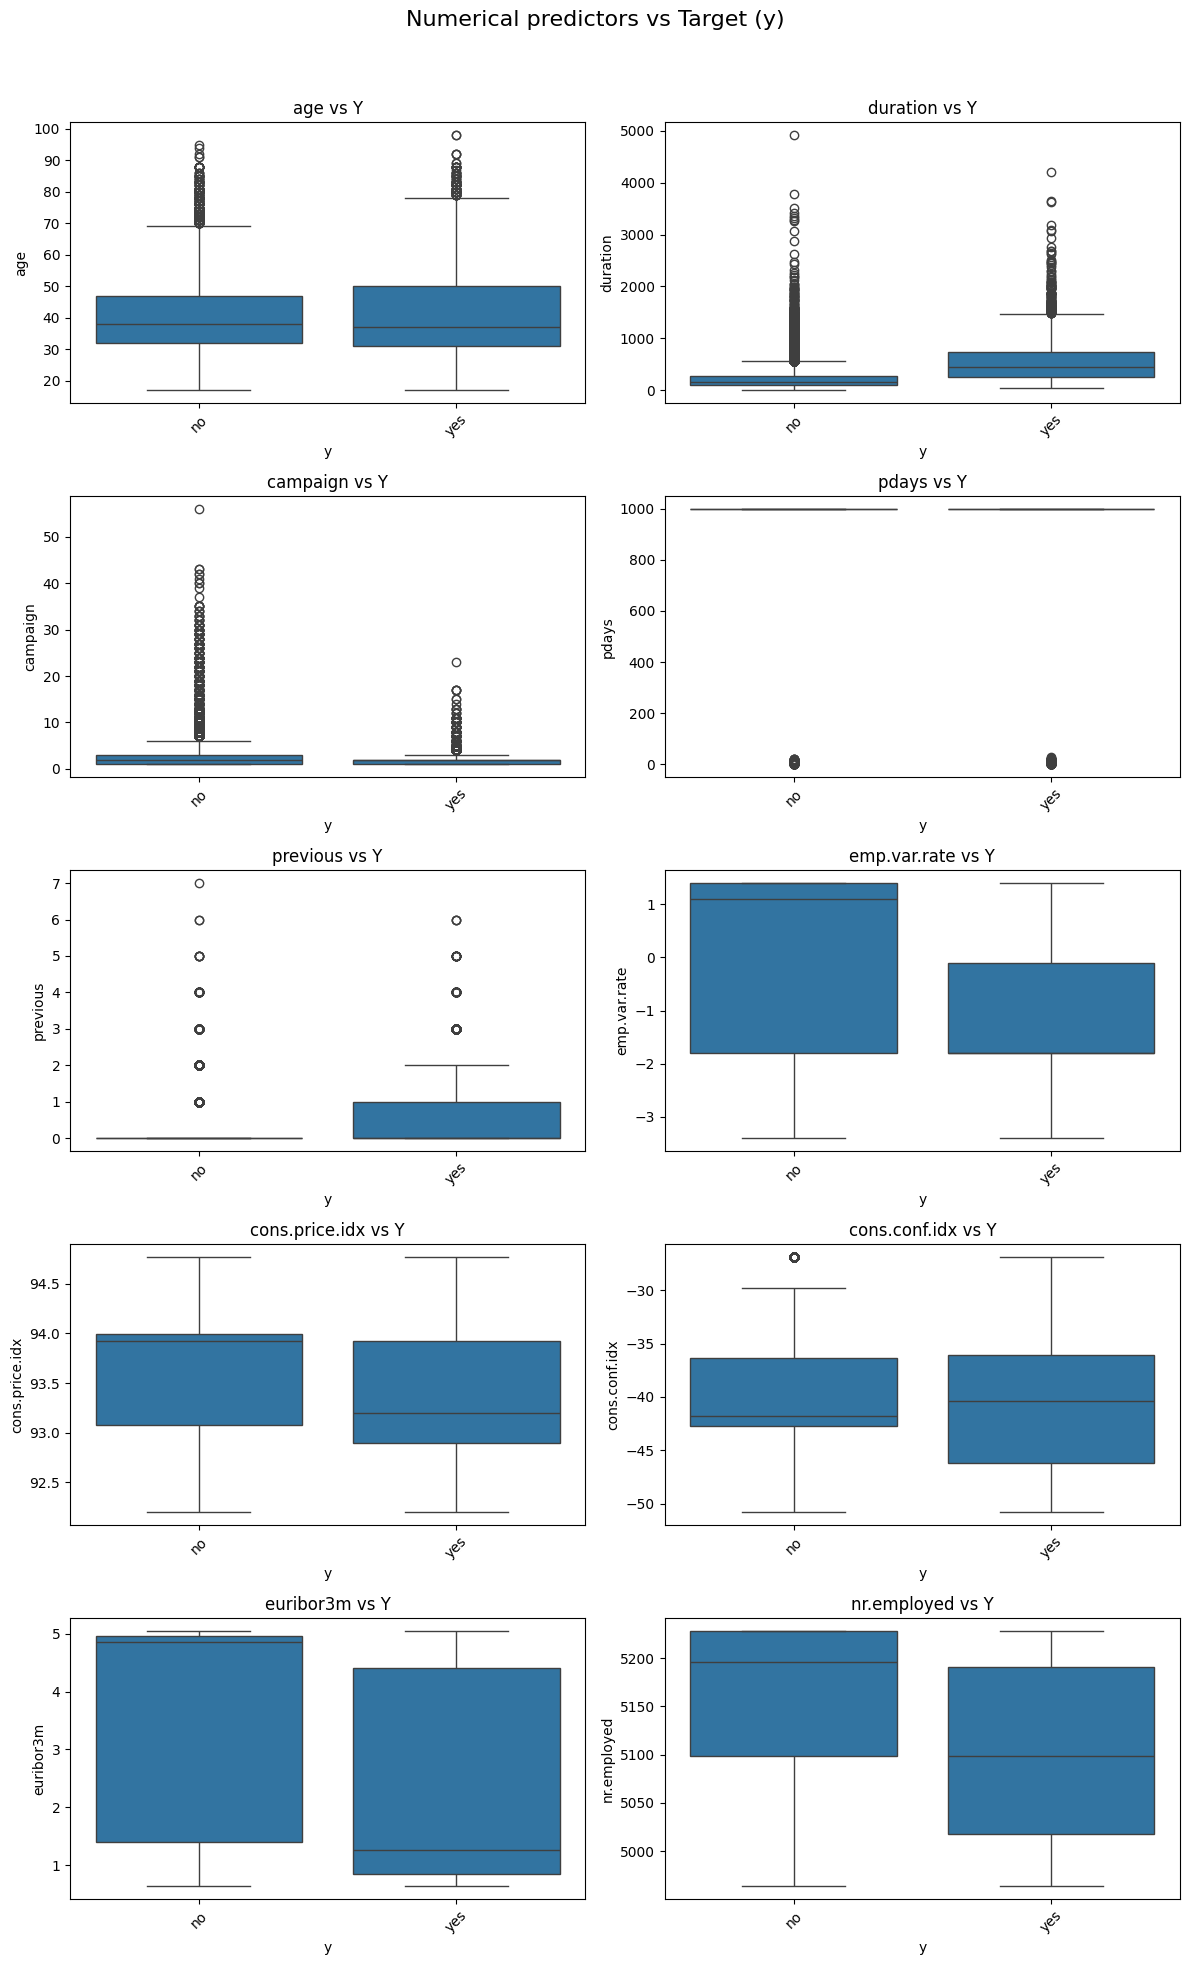

In [15]:
fig, axes = plt.subplots(nrows = int(len(numeric_predictors)/2), ncols = 2, figsize = (12, 2*len(categorical_predictors)))
fig.suptitle('Numerical predictors vs Target (y)', fontsize=16)

lin = 0
for i, column in enumerate(numeric_predictors):
    col = i % 2
    sns.boxplot(data = df, x = goal_attribute, y = column, ax=axes[lin, col])
    axes[lin, col].set_title(f"{column} vs Y")
    axes[lin, col].set_xlabel("y")
    axes[lin, col].set_ylabel(column)
    axes[lin, col].tick_params(axis='x', rotation=45)

    if i%2 == 1:
        lin = lin + 1


plt.tight_layout(rect=[0,0,1,0.96])
plt.show()


The *boxplots* illustrate how the numeric predictors relate to the *target variable 'y'*.

1. *'Age' vs 'y':* The age distribution is quite similar between clients who subscribed ('yes') and those who did not ('no'). However there's a slightly higher median age among those who subscribed, suggesting that older clients are more likely to open a term deposit.
2. *'Duration' vs 'y':* Clients who subscribed tend to have significantly longer call durations, indicating that longer conversations are strongly associated with successful subscriptions, likely reflecting higher engagement during contact.
3. *'campaign' vs 'y':* The number of contacts performed during the current campaign tends to be slightly lower for clients who subscribed, suggesting fewer contacts may be more effective.
4. *'Pdays' vs 'y':* The 'pdays' variable shows that most of the clients have a value near '999', meaning they had not been previously contacted. For those who were contacted earlier (low pdays values), there is a slightly higher tendency to subscribe, especially when the previous contact occurred recently.
5. *'Previous' vs 'y':* Clients who subscribed generally had a slightly higher number of previous contact, indicating that clients preivously cantacted may have a higher chance of subscribing.
6. *'emp.var.rate' vs 'y':* Clients who subscribed tend to be associated with lower or negative employment variation rates, this suggests that term deposits were more often subscribed during less favorable economic conditions.
7. *'cons.price.idx' vs 'y':* The consumer price index is lower for clients who subscribed, suggesting that clients were more likely to subscribe when prices were relatively lower, possibily reflecting more stable or favorable economic conditions. However the difference is small, indicating a weak correlation with the target.
8. *'cons.conf.idx' vs 'y':* 
9. *'euribor3m' vs 'y':*
10. *'nr.employed' vs 'y':*

##### Distribution of Categorical Variables

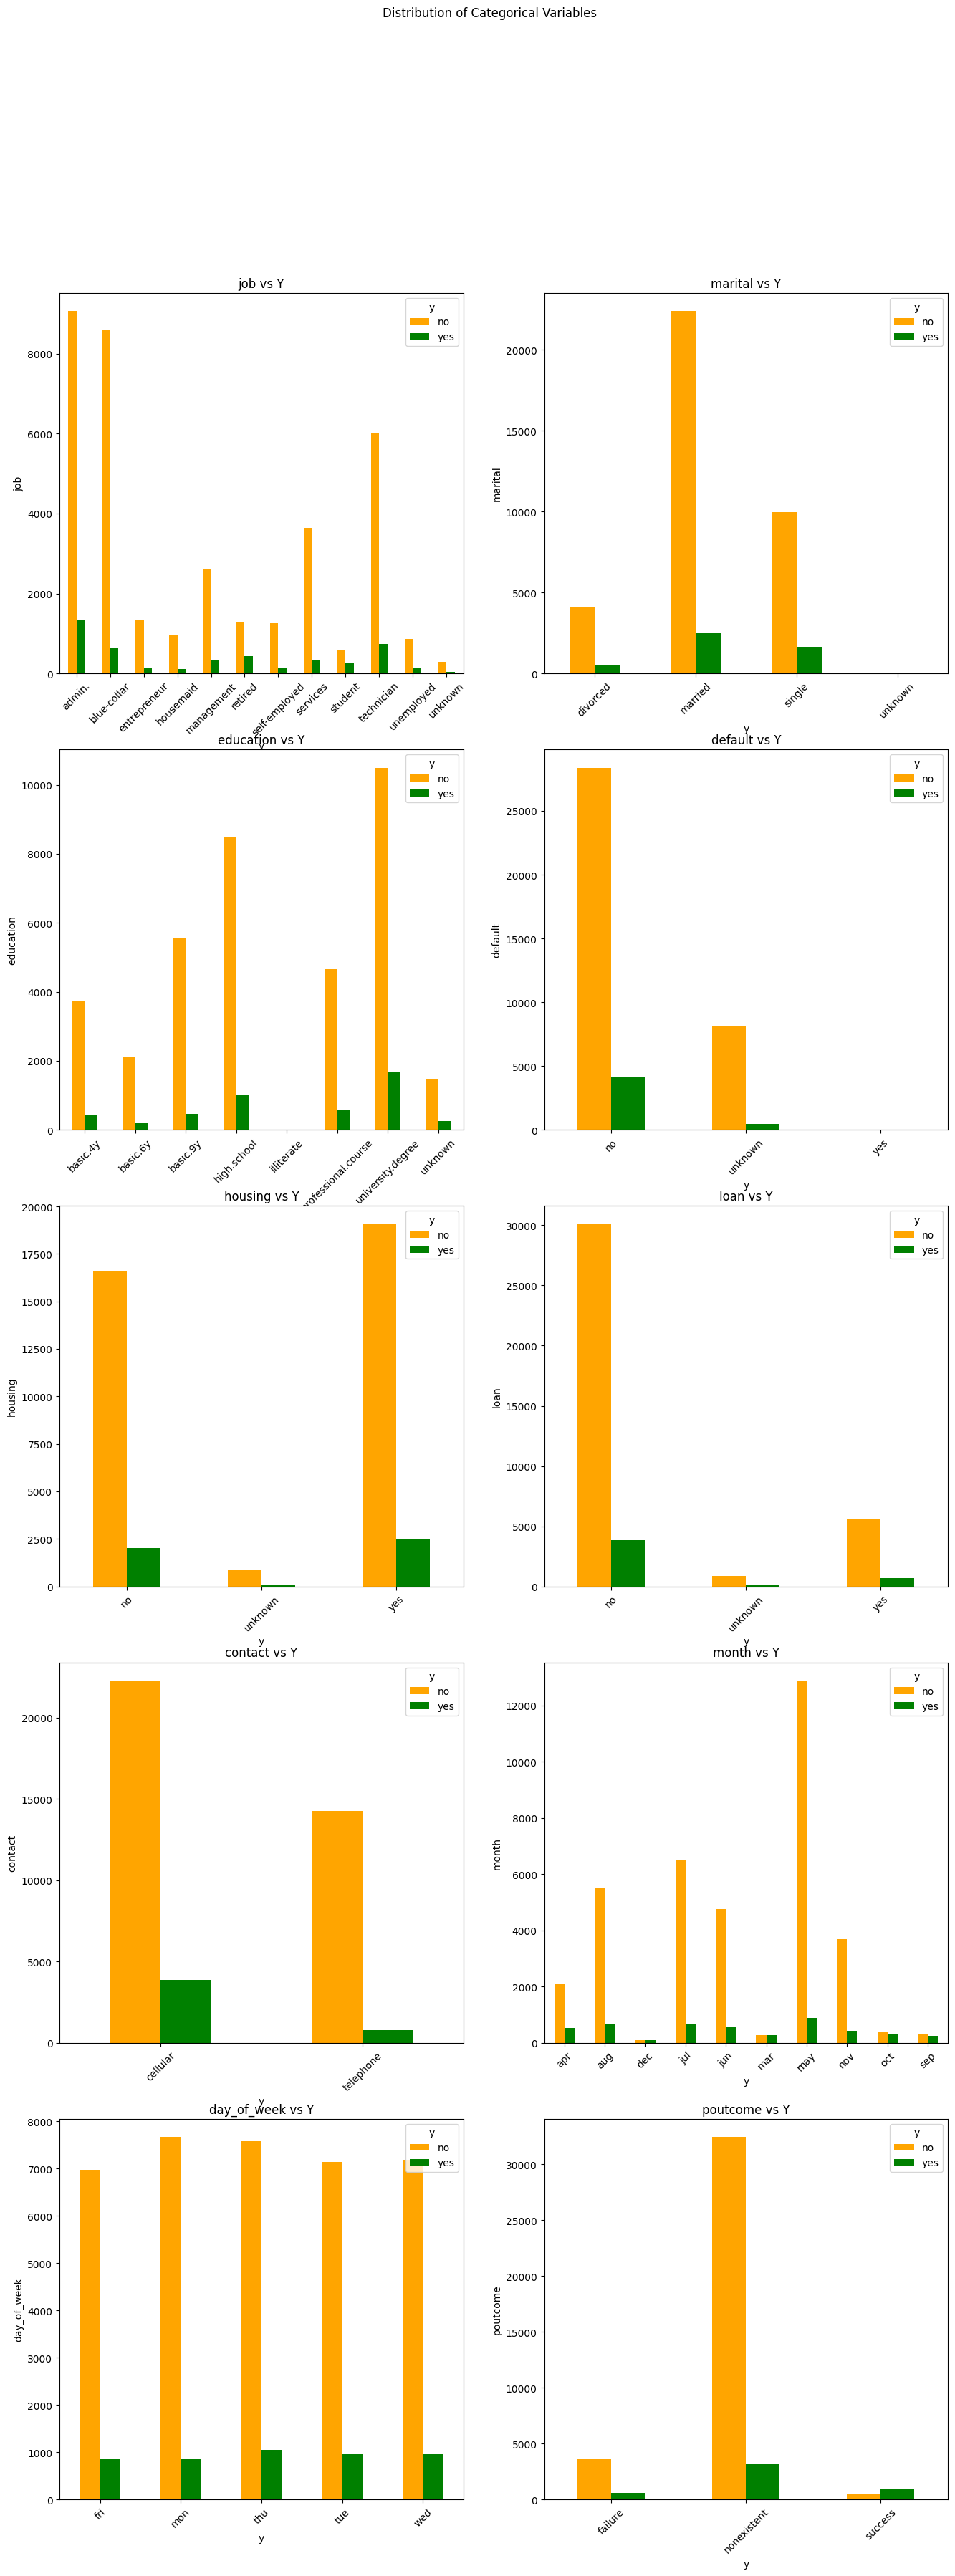

In [16]:
fig, axes = plt.subplots(nrows=int(len(categorical_predictors)/2), ncols = 2, figsize=(16, 40))
fig.suptitle('Distribution of Categorical Variables')

lin=0
for i , column in enumerate(categorical_predictors):
    col = i%2
    CrossTabResult=pd.crosstab(index=df[column], columns=df[goal_attribute])
    CrossTabResult.plot.bar(color=['orange', 'green'], ax=axes[lin,col])

    axes[lin, col].set_title(f"{column} vs Y")
    axes[lin, col].set_xlabel("y")
    axes[lin, col].set_ylabel(column)
    axes[lin, col].tick_params(axis='x', rotation=45)
    
    if i%2 == 1:
        lin = lin + 1

Justificar:

-----
## 2. Data Cleaning & Preprocessing, Feature Selection
-----

Int this chapter, the steps performed to clean and preprocess the dataset are described, ensuring the data quality required for modeling.
Additionally, the feature selection process is presented, aiming to identify the most relevant attributes that contribute to predicting the target variable. 

##### Information about categorical predictors

In [51]:
for col in categorical_predictors:
    print(f"{col}: {df[col].unique()}\n")


unknown_predictors = [
    col for col in categorical_predictors if df[col].astype(str).str.contains("unknown", case=False).any()
]

markdown_output = "#### Some predictors have \"unknown\" label.\n"
markdown_output += "\n".join(f"- {col}" for col in unknown_predictors)
display(Markdown(markdown_output))

job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

marital: ['married' 'single' 'divorced' 'unknown']

education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

default: ['no' 'unknown' 'yes']

housing: ['no' 'yes' 'unknown']

loan: ['no' 'yes' 'unknown']

contact: ['telephone' 'cellular']

month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']

poutcome: ['nonexistent' 'failure' 'success']



#### Some predictors have "unknown" label.
- job
- marital
- education
- default
- housing
- loan

##### Overview of the missing values and the precentage of missing values 

In [53]:
df_info = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Percentage Missing': (df.isnull().sum() / df.shape[0]) * 100
})
df_info.sort_values(by='Missing Values', ascending=False)

,Missing Values,Percentage Missing
age,0,0.0
campaign,0,0.0
nr.employed,0,0.0
euribor3m,0,0.0
cons.conf.idx,0,0.0
cons.price.idx,0,0.0
emp.var.rate,0,0.0
poutcome,0,0.0
previous,0,0.0
pdays,0,0.0


Since the missing values are labeled with "unknown" and not "NaN", there are no records with missing values.

##### Missing Values

In [54]:
missing_values = df.isna().sum()
missing_values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [55]:
markdown_output = "##### While the dataset does not contain any missing (NaN) values, the presence of the label 'unknown' in certain predictors indicates unreported information and should be treated as missing during data cleaning."
display(Markdown(markdown_output))


# Count "unknown" values before cleaning
print("Before cleaning:")
for col in unknown_predictors:
    count = (df[col].astype(str).str.lower() == "unknown").sum()
    if count > 0:
        print(f"{col}: {count} unknowns")

df[unknown_predictors] = df[unknown_predictors].replace('unknown', pd.NA)
missing_values = df.isna().sum()

print()
print('Missing Values (Unknown converted do NaN)')
print(missing_values)

original_num_rows = df.shape[0]
print(original_num_rows)
df = df.dropna()
missing_values_after_drop = df.isna().sum()
num_rows_after_cleanup = df.shape[0]
print(num_rows_after_cleanup)

print()
print('Missing Values after cleaning')
print(missing_values_after_drop)

deleted_rows = original_num_rows-num_rows_after_cleanup
print()
print(deleted_rows, 'rows deleted')

print()
print("Dataset labels after \"unknown\" removal:")

for col in categorical_predictors:
    print(f"{col}: {df[col].unique()}\n")


##### While the dataset does not contain any missing (NaN) values, the presence of the label 'unknown' in certain predictors indicates unreported information and should be treated as missing during data cleaning.

Before cleaning:
job: 330 unknowns
marital: 80 unknowns
education: 1731 unknowns
default: 8597 unknowns
housing: 990 unknowns
loan: 990 unknowns

Missing Values (Unknown converted do NaN)
age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64
41188
30488

Missing Values after cleaning
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous     

##### Correlation Matrix

In [90]:
#plt.figure(figsize=(40, 40))
#sns.heatmap(df_all_numeric.corr(),
 #           annot=True,
  #          square=True,
   #         cmap='coolwarm',
    #        annot_kws={'size': 12})  # make numbers smaller or larger
#plt.xticks(rotation=45, ha='right', fontsize=15)
#plt.yticks(rotation=0, fontsize=15)
#plt.show()

##### Correlation matrix of numeric variables

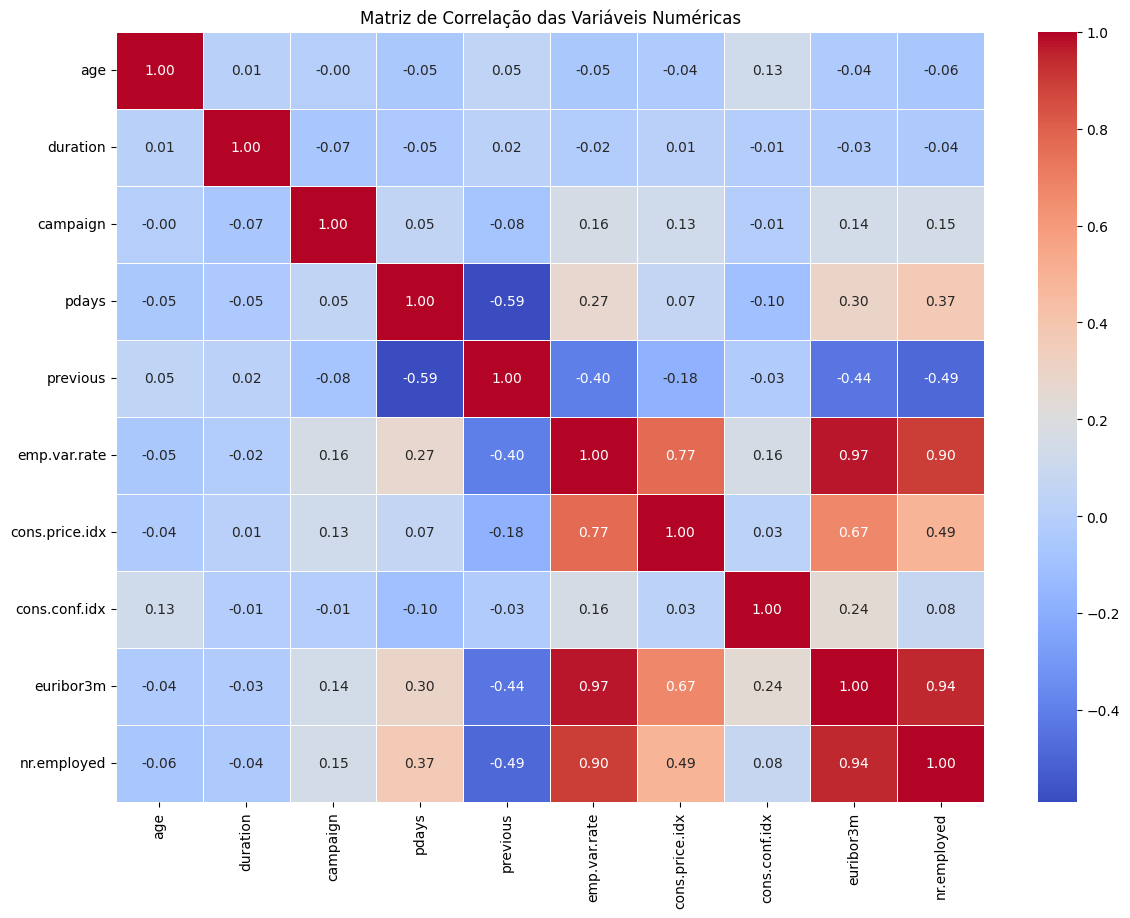

In [21]:
num_pred = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = num_pred.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

The figure above represents the correlation matrix for all numerical predictores in the dataset. Correlation coefficients range from -1 to +1. Values close to 0 indicate small or no linear relationship between variables.

1. Variables with strong correlations:
   - Macro-economic indicators are higly correlatade:
     - 'emp.var.rate' and 'euribor3m': 0.97
     - 'euribor3m' and 'nr.employed': 0.94
     - 'emp.var.rate' and 'nr.employed': 0.90
     - 'emp.var.rate' and 'cons.price.idx': 0.77
     - 'euribor3m' and 'cons.price.idx': 0.67
       
These storng correlations suggest multicollinearity among the macro-economic variables, meanging ther contain overlapping information about the same economic conditions.

2. Variables with moderate correlations:
   - 'pdays' and 'previous': -0.59 -> negative correlation, as clients with no previous contact have pdays coded as 999.
   - 'pdays' and 'nr.employed': 0.37
   - 'pdays' and 'euribor3m': 0.30
   - 'pdays' and 'emp.var.rate':0.27

These indicates that the timing of previous contacts might be related to broader economic trends during the campaign period.

3. Variables with weak correlations:
   - 'age' and 'campaing' have very weak correlations with other numeric variables;
   - 'duration' is nearly uncorrelated with any other variable, indicating it provides unique information, however, this variable can act as a data leakage variable, since it is known only after call ends.
   - 'cons.conf.idx' shows weal relationships with all the variables, meaning it captures independent information about costumer confidence (???) 

### Preprocessing

##### Transforming all the variables in numeric

In [56]:
df_all_numeric = df.copy()

# binary variables transformation
binary_vars = ["default", "housing", "loan", "y"]
non_binary_vars = ["job", "marital", "education", "poutcome"]

for var in binary_vars:
    df_all_numeric[var] = (df_all_numeric[var].values == 'yes').astype(int)

df_all_numeric['contact'] = (df_all_numeric['contact'].values == 'cellular').astype(int)

# non_binary variables transformation
df_all_numeric = pd.get_dummies(df_all_numeric, columns=non_binary_vars, drop_first=True, dtype=int)

# date type variables transformation
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

day_map = {
    'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5
}

df_all_numeric['month'] = df_all_numeric['month'].map(month_map)
df_all_numeric['day_of_week'] = df_all_numeric['day_of_week'].map(day_map)

# TO USE FOR SCALING DF_ALL_NUMERIC
non_binary_preds = list(numeric_predictors)
non_binary_preds.extend(["month", "day_of_week"])

df_all_numeric

,age,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,...,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,poutcome_nonexistent,poutcome_success
0,56,0,0,0,0,5,1,261,1,999,...,1,0,0,0,0,0,0,0,1,0
2,37,0,1,0,0,5,1,226,1,999,...,1,0,0,0,1,0,0,0,1,0
3,40,0,0,0,0,5,1,151,1,999,...,1,0,1,0,0,0,0,0,1,0
4,56,0,0,1,0,5,1,307,1,999,...,1,0,0,0,1,0,0,0,1,0
6,59,0,0,0,0,5,1,139,1,999,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0,1,0,1,11,5,334,1,999,...,1,0,0,0,0,0,1,0,1,0
41184,46,0,0,0,1,11,5,383,1,999,...,1,0,0,0,0,0,1,0,1,0
41185,56,0,1,0,1,11,5,189,2,999,...,1,0,0,0,0,0,0,1,1,0
41186,44,0,0,0,1,11,5,442,1,999,...,1,0,0,0,0,0,1,0,1,0


     Count  Percentage
y                     
no   26629   87.342561
yes   3859   12.657439


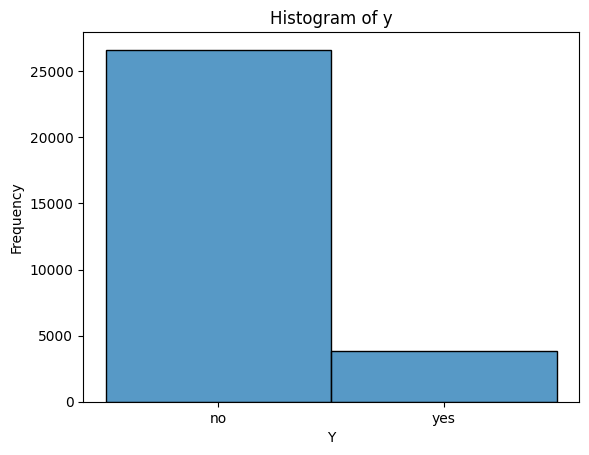

In [57]:
y_counts = df['y'].value_counts()
y_percentage = df['y'].value_counts(normalize=True)*100

y_var_dataframe = pd.DataFrame({
    "Count": y_counts,
    "Percentage": y_percentage
})

print(y_var_dataframe)

sns.histplot(df[goal_attribute])

plt.title(f"Histogram of {goal_attribute}")
plt.xlabel("Y")
plt.ylabel("Frequency")

plt.show()

##### Correlation matrix of all the variables converted to numeric

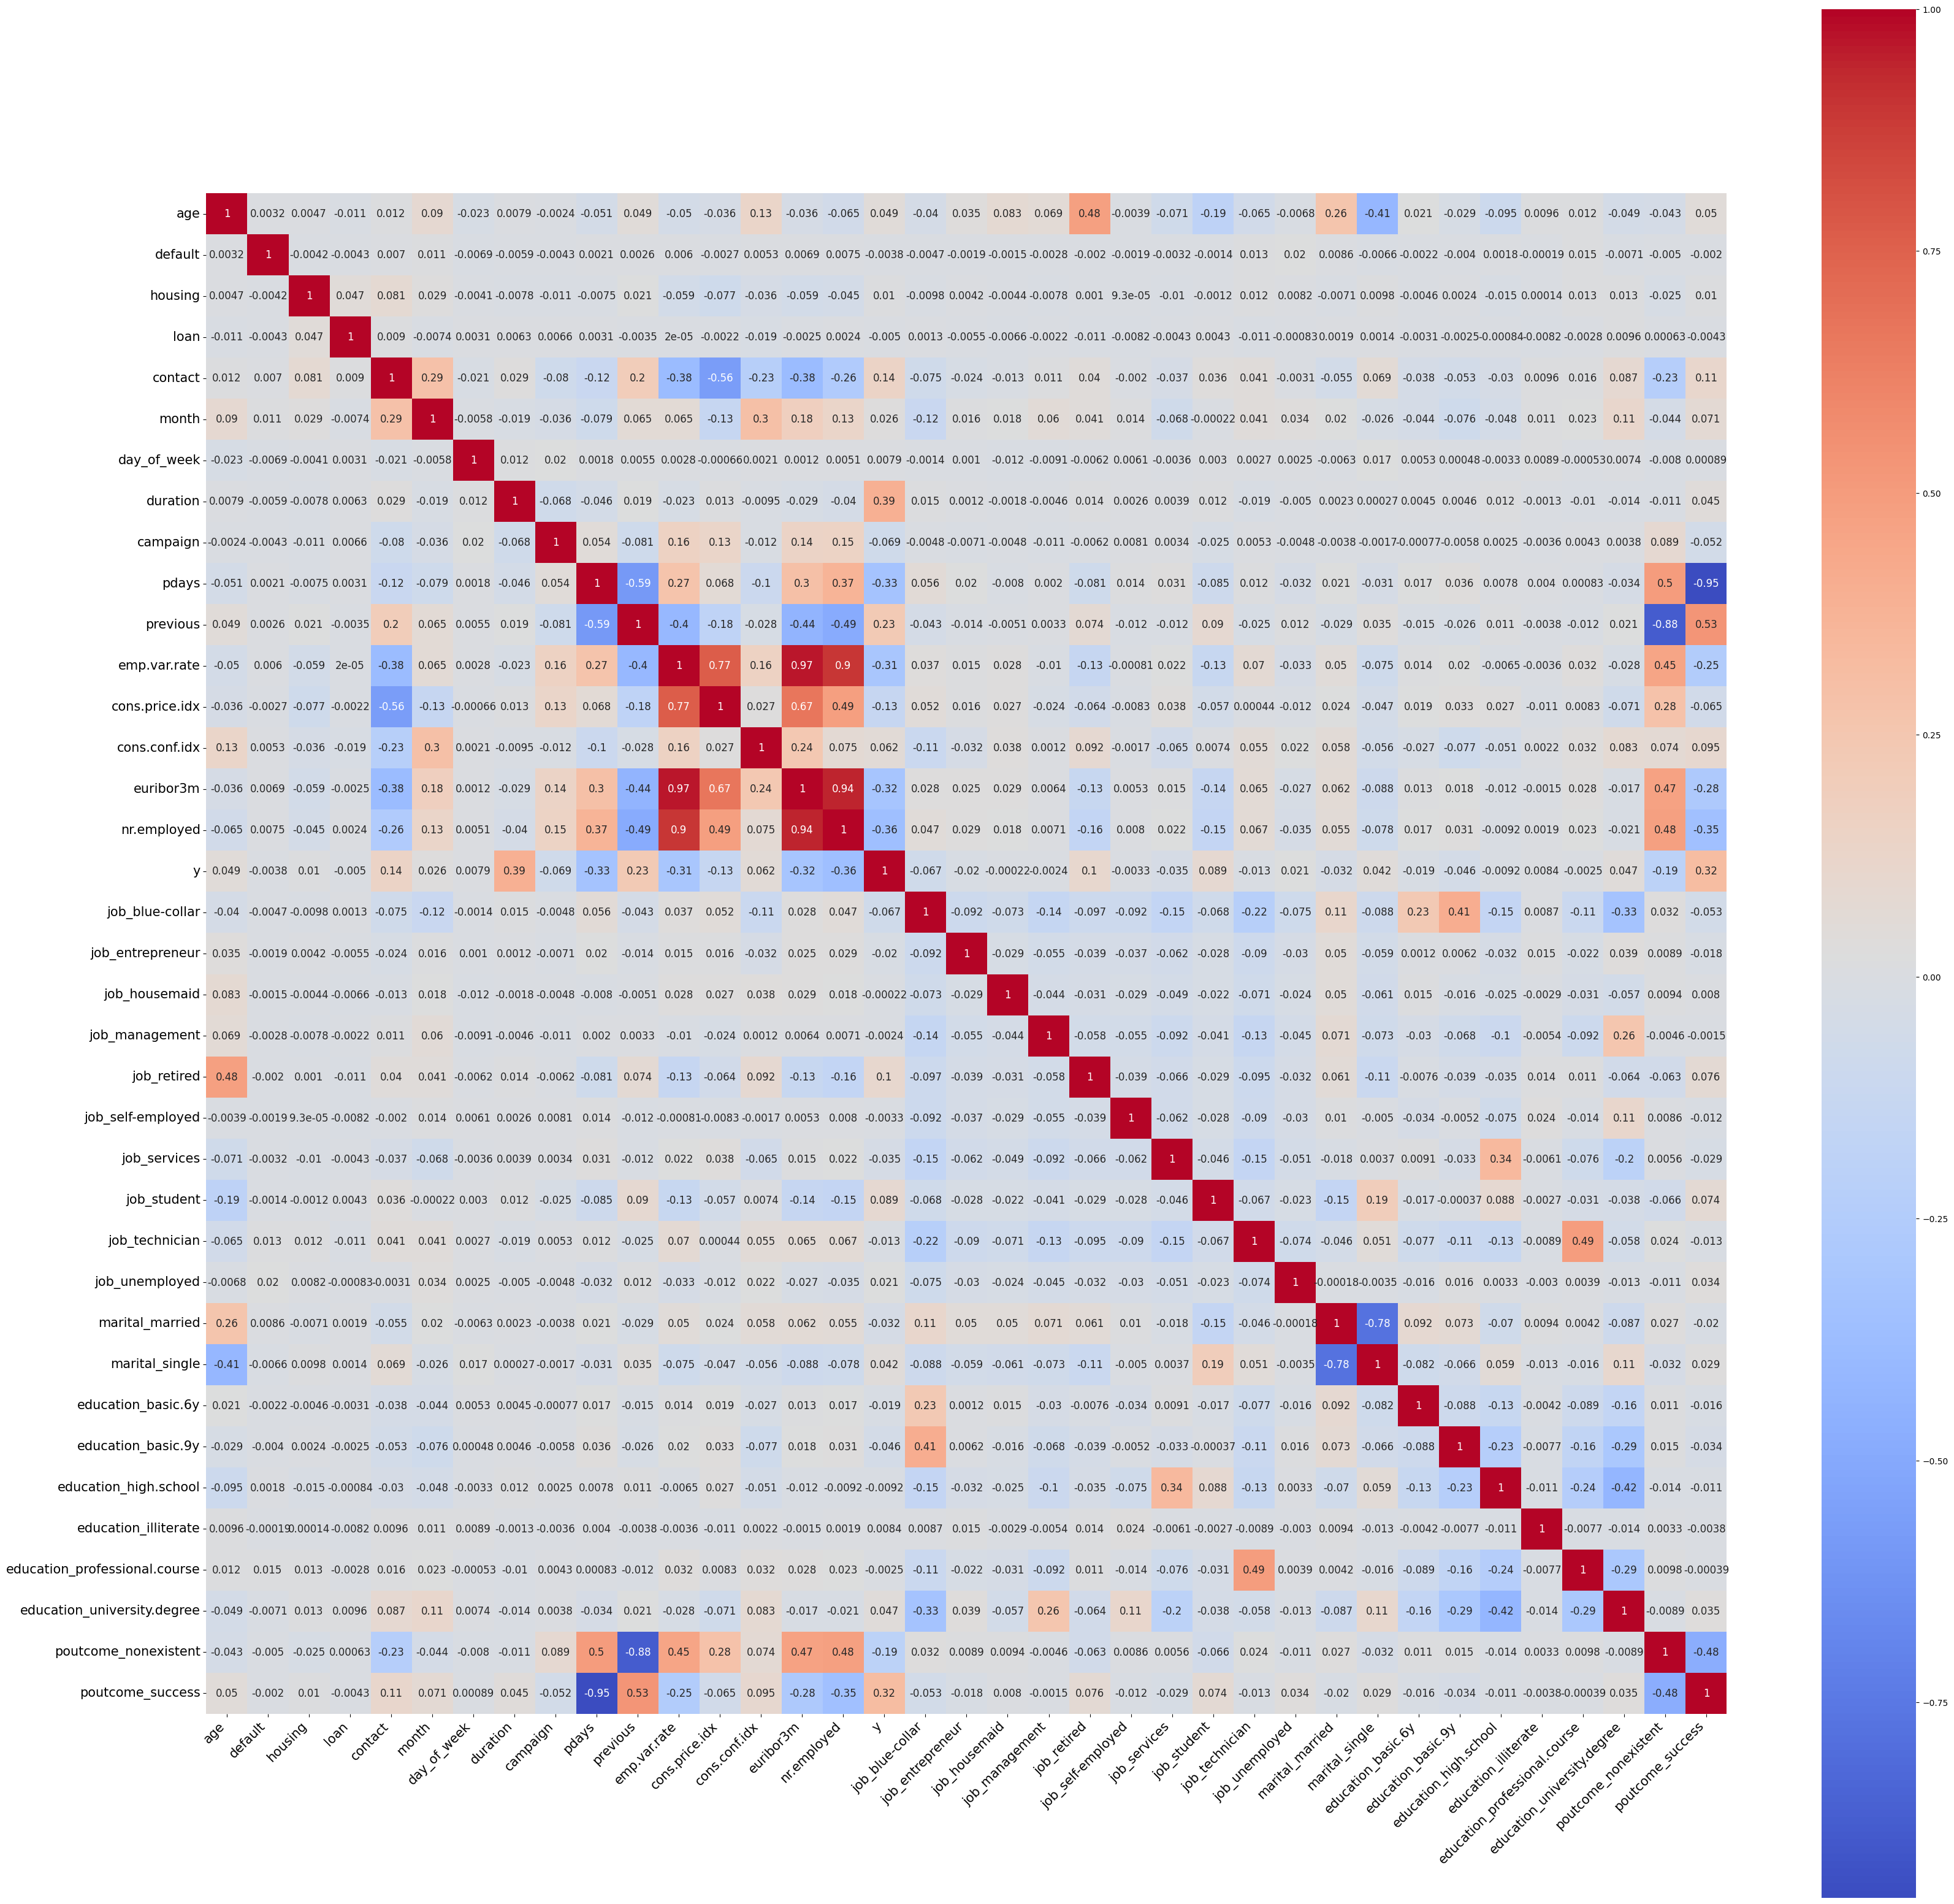

In [24]:
plt.figure(figsize=(40, 40))
sns.heatmap(df_all_numeric.corr(),
            annot=True,
            square=True,
            cmap='coolwarm',
            annot_kws={'size': 12})  # make numbers smaller or larger
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.show()

### Feature Selection

#### Filter Methods

Chi-Squared

In [25]:
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    print('##### Chi-Squared Results ##### \n')
    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

print(FunctionChisq(df, goal_attribute, categorical_predictors))

##### Chi-Squared Results ##### 

job is correlated with y | P-Value: 2.0331366964644903e-150
marital is correlated with y | P-Value: 1.5437375141708132e-12
education is correlated with y | P-Value: 1.4392502431733715e-22
default is NOT correlated with y | P-Value: 1.0
housing is NOT correlated with y | P-Value: 0.08165923643721153
loan is NOT correlated with y | P-Value: 0.39315834880742473
contact is correlated with y | P-Value: 4.9019513362846015e-139
month is correlated with y | P-Value: 0.0
day_of_week is correlated with y | P-Value: 3.6893335993552954e-05
poutcome is correlated with y | P-Value: 0.0
['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']


##### Explicação: 

ANOVA

In [26]:
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

print(FunctionAnova(df, goal_attribute, numeric_predictors))

##### ANOVA Results ##### 

age is correlated with y | P-Value: 1.6971770131902196e-17
duration is correlated with y | P-Value: 0.0
campaign is correlated with y | P-Value: 1.083798752264484e-33
pdays is correlated with y | P-Value: 0.0
previous is correlated with y | P-Value: 0.0
emp.var.rate is correlated with y | P-Value: 0.0
cons.price.idx is correlated with y | P-Value: 7.760950794014084e-113
cons.conf.idx is correlated with y | P-Value: 4.6513680455036e-27
euribor3m is correlated with y | P-Value: 0.0
nr.employed is correlated with y | P-Value: 0.0
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


##### Explicação:

#### Embebed Methods

##### Lasso Regularization

In [27]:
def lasso_regularization(df):

    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    from sklearn.feature_selection import SelectFromModel
    
    X = df.iloc[:,:-1]          
    y = df.iloc[:,-1] 
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    scaler = StandardScaler()
    scaler.fit(X_train)

    # fit a Logistic Regression model and feature selection altogether 
    # select the Lasso (l1) penalty.
    # The selectFromModel class from sklearn, selects the features which coefficients are non-zero

    sel_ = SelectFromModel(LogisticRegression(C=0.5, penalty='l1', solver='liblinear', random_state=10))

    sel_.fit(scaler.transform(X_train), y_train)

    # make a list with the selected features
    selected_feat = X_train.columns[(sel_.get_support())]
    
    print("Number of features which coefficient was shrank to zero: ", np.sum(sel_.estimator_.coef_ == 0))
    # identify the removed features like this:
    removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
    print(removed_feats) 

    # transform data
    X_lasso = pd.DataFrame(sel_.transform(scaler.transform(X)), columns=selected_feat)
    
    return X_lasso

In [28]:
df_lasso = lasso_regularization(df_all_numeric)

Number of features which coefficient was shrank to zero:  9
Index(['default', 'euribor3m', 'nr.employed', 'job_management',
       'job_technician', 'marital_single', 'education_basic.6y',
       'education_illiterate', 'poutcome_nonexistent'],
      dtype='object')


##### Explicação: 

##### Random Forest

PCA - Principal Component Analysis

In [82]:
X = df_all_numeric.drop(columns=['y'])
y = df_all_numeric['y']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.30, random_state=42, stratify=y)

# Aplicar o scaling apenas após a divisão dos dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nTamanho de X_train_scaled:", X_train_scaled.shape)
print("\nTamanho de X_test_scaled:", X_test_scaled.shape)

from sklearn.decomposition import PCA 
pca = PCA(n_components=0.95) #95% da variância
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

print("\nTamanho de X_train_scaled_pca:", X_train_scaled_pca.shape)
print("\nTamanho de X_test_scaled_pca:", X_test_scaled_pca.shape)


Tamanho de X_train_scaled: (21341, 36)

Tamanho de X_test_scaled: (9147, 36)

Tamanho de X_train_scaled_pca: (21341, 27)

Tamanho de X_test_scaled_pca: (9147, 27)


Removing outliers

In [83]:
def calculate_outliers(df):
    outliers_info = {}
    for column in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_info[column] = len(outliers)
    
    return outliers_info

# Calcular os outliers em todas as variáveis numéricas
outliers_summary = calculate_outliers(df)
outliers_df = pd.DataFrame(list(outliers_summary.items()), columns=['Variable', 'Number of Outliers'])
outliers_df

,Variable,Number of Outliers
0,age,458
1,duration,2174
2,campaign,1675
3,pdays,1310
4,previous,4652
5,emp.var.rate,0
6,cons.price.idx,0
7,cons.conf.idx,396
8,euribor3m,0
9,nr.employed,0


Outlier detection was made through linear regression

In [85]:
model = LinearRegression()
model.fit(X_train_scaled_pca, y_train)

y_pred = model.predict(X_train_scaled_pca)
residuals = np.abs(y_train - y_pred)

threshold = 1.5 * np.std(residuals)
outliers_regression = residuals > threshold

num_outliers_regression = np.sum(outliers_regression)
print(f"Number of outliers detected using Regression (Residuals): {num_outliers_regression}")

X_train_no_outliers = X_train_scaled_pca[~outliers_regression]
y_train_no_outliers = y_train[~outliers_regression]
y_train_no_outliers = y_train_no_outliers.astype(int)

print("\nTamanho de X_train sem outliers:", X_train_no_outliers.shape)
print("Tamanho de y_train sem outliers:", y_train_no_outliers.shape)

Number of outliers detected using Regression (Residuals): 3358

Tamanho de X_train sem outliers: (17983, 27)
Tamanho de y_train sem outliers: (17983,)


Explicação: 

In [67]:
y_pred_test = model.predict(X_test_scaled_pca)
 
# Calcular os resíduos absolutos no conjunto de teste
residuals_test = np.abs(y_test - y_pred_test)
 
# Identificar outliers no conjunto de teste com base no mesmo limiar
outliers_test = residuals_test > threshold
 
# Contar o número de outliers no conjunto de teste
num_outliers_test = np.sum(outliers_test)
print(f"Número de outliers detectados no conjunto de teste: {num_outliers_test}")
 
# Criar X_test e y_test sem os outliers
X_test_no_outliers = X_test_scaled_pca[~outliers_test]
y_test_no_outliers = y_test[~outliers_test]
y_test_no_outliers = y_test_no_outliers.astype(int)
 
# Verificar o tamanho dos novos conjuntos de teste sem outliers
print("\nTamanho de X_test sem outliers:", X_test_no_outliers.shape)
print("Tamanho de y_test sem outliers:", y_test_no_outliers.shape)

Número de outliers detectados no conjunto de teste: 1434

Tamanho de X_test sem outliers: (7713, 27)
Tamanho de y_test sem outliers: (7713,)


Explicação:

### Sampling methods for model evaluation

Holdout method

In [75]:
X = df.drop(columns = ['y'])
# y -> variável alvo -> target_class
y = df['y']


# Divisão dos dados 70/30 -> 70% treino + 30% teste
X_train, X_test, y_train, y_test = train_test_split(df_all_numeric, y, test_size=0.3, random_state=0, stratify=y)

reports = {}

# Logistic Regression
log_regression_model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0)
log_regression_model.fit(X_train, y_train)
y_pred_log_reg = log_regression_model.predict(X_test)

# Imprimir o relatório para Logistic Regression
reports['Holdout LR'] = classification_report(y_test, y_pred_log_reg, output_dict=True)
print('\nClassification Report for Holdout logistic Regression: \n', classification_report(y_test, y_pred_log_reg))

#-------------------------------#
# Linear Discriminant Analysis (LDA)
lda_model = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')
lda_model.fit(X_train, y_train)
y_pred_lda = lda_model.predict(X_test)

reports['Holdout LDA'] = classification_report(y_test, y_pred_lda, output_dict=True)
print("\nClassification Report for Holdout LDA:\n", classification_report(y_test, y_pred_lda))

#-------------------------------#
# Quadratic Discriminant Analysis (LDA)
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)
y_pred_qda = qda_model.predict(X_test)

reports['Holdout QDA'] = classification_report(y_test, y_pred_qda, output_dict=True)
print("\nClassification Report for Holdout QDA:\n", classification_report(y_test, y_pred_qda))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



Classification Report for Holdout logistic Regression: 
               precision    recall  f1-score   support

          no       1.00      1.00      1.00      7989
         yes       1.00      1.00      1.00      1158

    accuracy                           1.00      9147
   macro avg       1.00      1.00      1.00      9147
weighted avg       1.00      1.00      1.00      9147


Classification Report for Holdout LDA:
               precision    recall  f1-score   support

          no       1.00      1.00      1.00      7989
         yes       1.00      1.00      1.00      1158

    accuracy                           1.00      9147
   macro avg       1.00      1.00      1.00      9147
weighted avg       1.00      1.00      1.00      9147



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Classification Report for Holdout QDA:
               precision    recall  f1-score   support

          no       1.00      1.00      1.00      7989
         yes       1.00      1.00      1.00      1158

    accuracy                           1.00      9147
   macro avg       1.00      1.00      1.00      9147
weighted avg       1.00      1.00      1.00      9147



Explicação:

Cross Validation (with k=5 and k=10) (rever)

In [78]:
skf_5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
skf_10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

lda = LDA()
qda = QDA()
lr = LogisticRegression()

models = [lda, qda, lr]

X = df_all_numeric.values
y = df['y'].values

print("Cross Validation Results:")
for model in models:
    print("---------------------------------------------------------")
    print(model)
    print("5 folds")
    acc = cross_val_score(model, X, y, cv=skf_5, scoring='accuracy')
    print(f"Mean Accuracy: {acc.mean():.4f} ± {acc.std():.4f}")
    print("10 folds")
    acc = cross_val_score(model, X, y, cv=skf_10, scoring='accuracy')
    print(f"Mean Accuracy: {acc.mean():.4f} ± {acc.std():.4f}")

Cross Validation Results:
---------------------------------------------------------
LinearDiscriminantAnalysis()
5 folds
Mean Accuracy: 0.8978 ± 0.0016
10 folds
Mean Accuracy: 0.8984 ± 0.0042
---------------------------------------------------------
QuadraticDiscriminantAnalysis()
5 folds


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/F

Mean Accuracy: 0.9999 ± 0.0002
10 folds


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/F

Mean Accuracy: 1.0000 ± 0.0000
---------------------------------------------------------
LogisticRegression()
5 folds


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Mean Accuracy: 0.9399 ± 0.0391
10 folds


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Mean Accuracy: 0.9564 ± 0.0360


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Leave-One-Out Cross Validation

Bootstrap Sampling

### Predictive Models

**K-Nearest Neighbors (KNN) and Naive Bayes**

In [88]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('Naive Bayes', GaussianNB()))

### Neural Networks